# 핸즈온 머신러닝 실습하기
## Chapter 3
2019-02-14

## 3.1 MNIST

In [59]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
IMAGES_PATH = os.path.join("images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# mnist

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int)

In [14]:
print(X.shape, y.shape)
#7만개 이미지, 28*28픽셀(784)

(70000, 784) (70000,)


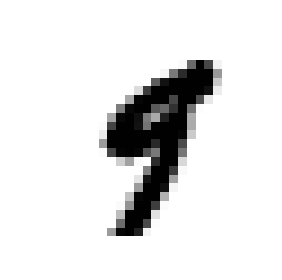

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [18]:
y[36000] #위 값이 9를 나타냄을 의미함

9

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [60]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 3.2 이진 분류기 훈련

In [61]:
y_train_5 = (y_train == 5) #5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == 5)
#5와 5가 아님의 두개의 클래스를 구분

In [63]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\sjsjs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
sgd_clf.predict([some_digit])

array([False])

분류기가 이미지를 5가 아니라고 추측함 잘맞아 떨어짐

## 3.3 성능 측정
회귀보다 평가가 어려움
### 3.3.1 교차 검증을 사용한 정확도 측정

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\sjsjs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sjsjs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sjsjs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([0.96085, 0.9489 , 0.96625])

In [48]:
# 교차 검증 과정을 직접 구현하기
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3, random_state=42)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = (y_train_5[train_index])
#     X_test_fold = X_train[test_index]
#     y_test_fold = (y_train_5[test_index])

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

모든 교차 검증 폴드의 정확도가 95%이상이다! (5임을 예측할 때)
5가 아님에 대한 예측 정확도를 보자.  
//이런 수치들은 책과 항상 다르다. 아마 랜덤 셔플이 문제인듯

In [49]:
#5 아님을 분류하기 위한 더미 분류기
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [50]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9093 , 0.912  , 0.90765])

### 3.3.2 오차 행렬
분류기의 성능을 평가하는 더 좋은 방법.
클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것
5의 이미지를 3으로 잘못 분류한 경우는 오차 행렬 5행 3열을 보면 된다.
- 실제 타깃과 비교할 수 있도록 먼저 예측값을 만들어야 한다 (cross_val_perdict()함수 사용)

In [51]:
from sklearn.model_selection import cross_val_predict
#평가 점수가 아닌 예측값을 반환
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\sjsjs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sjsjs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sjsjs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53382,  1197],
       [ 1139,  4282]], dtype=int64)

- 첫번째 행 : 음성 클래스(5가 아님)
    - 첫번째 열 : **진짜 음성**(5가 아님을 정확히 분류함)
    - 두번째 열 : **거짓 양성**(5라고 잘못 분류함)
- 두번째 행 : 양성 클래스(5임)
    - 첫번째 열 : **거짓 양성**(5가 아님으로 잘못 분류함)
    - 두번째 열 : **진짜 양성**(5라고 정확히 분류함)
    
좋은 분류기라면 왼쪽 위에서 오른쪽 아래 대각선 방향으로 값이 집중되어야 한다.

**정밀도** : 양성 예측의 정확도 = 진짜 양성/(진짜 양성+거짓 양성)  
**재현율(민감도)** : 진짜 양성/(진짜 양성 + 거짓 음성)

재현율은 분류기가 정확하게 감지한 양성 샘플의 비율이다

### 정밀도와 재현율

In [56]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.781529476181785